<img src="http://www.ceic.org.ar/spanish/img/siisa-logo.jpg" align='right'>

# Evaluación sobre cliente Cuenca (ClientId=133)
Empiezo con la evaluación del cliente 136 (cuenta) puesto que en el grafo diseniado utiliza los 3 bureau de consulta (nosis, siisa y veraz). La politica seleccionda es la numero 10.

## Descripción del dataset:
El data set fue tomado de la base de datos para el número de cliente 136 y la politica 10. El dataset completo consta de ~23000 registros para esa politica abarcando las fechas desde el 2017-02-01 al 2019-05-23. 

In [1]:
# importo las librerias que voy a utilizar.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importo el dataset que se discute en la seccion de "descripcion del dataset"
df = pd.read_csv("Cliente_133_Policy_1_20181015_20190524.csv", low_memory=False)

In [3]:
# evalúo el tamanio del dataset.
df.shape

(29139, 467)

In [4]:
df.head(3)

,executionId,executionDate,executionDateTime,policyId,policyVersion,decisionResult,antiguedad_laboral,ApellidoNombre,Empleador,gastos_extracto,...,veraz_peorSituacionBureauActual,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado,Zona,ZonaFinal,ZonaNosis,ZonaSiisa
0,1212316,16/10/2018,13:16,1,82,Error en consulta a NOSIS,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1212346,16/10/2018,13:20,1,83,Error en consulta a NOSIS,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1212480,16/10/2018,13:38,1,83,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Me pregunto si todos los registros tienen toda la misma politica a fin de hacer debug sobre la consulta sql.
df.policyId.unique()

array([1], dtype=int64)

In [6]:
# Creo una columna que solo me diga si rechazo o califica spliteado el campo de decisionResult.
# Los strings son APROBADO o RECHAZAR un cliente en este caso serian OK, ERROR respectivamente.
df['decision_filtered'] = df.decisionResult.str.split("|", n = 1, expand = True)[0]

Rechaza por info NOSIS: Tiene al menos una Sit. mayor a 1 en (t)                                           8458
pide info extra                                                                                            8261
Rechaza: ingreso_F insuficiente                                                                            2980
APROBADO                                                                                                   2125
Rechaza por categorías de riesgo sin excepción                                                             1147
Rechaza: Score Veraz menor a 250                                                                            992
Rechaza por info NOSIS: Tiene al menos una Sit. mayor a 1 entre (t-1) y (t-2)                               723
Rechaza: veraz_peorSituacionBureauActual                                                                    706
Error en consulta a Veraz                                                                               

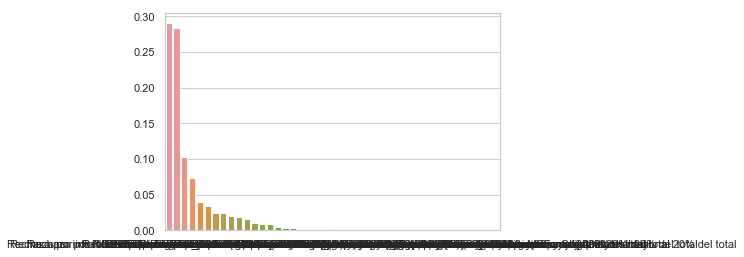

In [7]:
# Simplemente realizo un barplot para ver la distribucion de status de credito.
sns.set(style="whitegrid")
ax =sns.barplot(df.decision_filtered.value_counts().index, df.decision_filtered.value_counts().values/len(df.decision_filtered))
df.decision_filtered.value_counts()
# En este caso parece que error es sinonimo de no aprueba.

In [8]:
# Me quedo con todas las instancias donde siisa veraz y nosis fueron evaluadas.
df=df[~((df.veraz_score.isna()) & (df.siisa_score.isna()) & (df.nosis_score.isna()))]

In [9]:
# No me interesa las instancias donde tengo ERROR o ESCALAMIENTO
df = df.drop(df[df.decision_filtered=='ADVERTENCIA'].index)
df = df.drop(df[df.decision_filtered=='Rechaza: Posee Sit. Irregulares.'].index)
df = df.drop(df[df.decision_filtered=='"Error nosis no valida identidad"'].index)
df = df.drop(df[df.decision_filtered=='Documento en base de denegados'].index)
df = df.drop(df[df.decision_filtered=='Error consultando Nosis empleador'].index)
df = df.drop(df[df.decision_filtered=='Rechaza: posee Sit. Irregular.'].index)

Rechaza por info NOSIS: Tiene al menos una Sit. mayor a 1 en (t)                                           8458
pide info extra                                                                                            8261
Rechaza: ingreso_F insuficiente                                                                            2980
APROBADO                                                                                                   2125
Rechaza por categorías de riesgo sin excepción                                                             1147
Rechaza: Score Veraz menor a 250                                                                            992
Rechaza por info NOSIS: Tiene al menos una Sit. mayor a 1 entre (t-1) y (t-2)                               723
Rechaza: veraz_peorSituacionBureauActual                                                                    706
Error en consulta a Veraz                                                                               

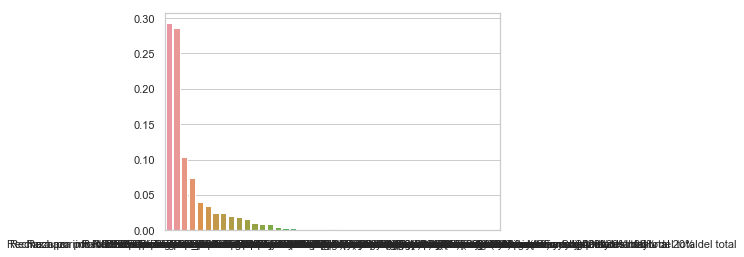

In [10]:
# Simplemente grafico la cantidad que pasa por califica o rechazo.
sns.set(style="whitegrid")
ax =sns.barplot(df.decision_filtered.value_counts().index, df.decision_filtered.value_counts().values/len(df.decision_filtered))
df.decision_filtered.value_counts()
# En este caso parece que error es sinonimo de no aprueba.

In [11]:
# Al final me tengo 23364 regristros que puedo evaluar.
df.shape

(28879, 468)

In [12]:
df.head(3)

,executionId,executionDate,executionDateTime,policyId,policyVersion,decisionResult,antiguedad_laboral,ApellidoNombre,Empleador,gastos_extracto,...,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado,Zona,ZonaFinal,ZonaNosis,ZonaSiisa,decision_filtered
0,1212316,16/10/2018,13:16,1,82,Error en consulta a NOSIS,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error en consulta a NOSIS
1,1212346,16/10/2018,13:20,1,83,Error en consulta a NOSIS,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error en consulta a NOSIS
13,1212987,16/10/2018,14:43,1,88,Error en consulta a SIISA (2),24.0,LUJAN ROBERTO CARLOS,abc,1101010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error en consulta a SIISA (2)


## Correlación entre variables.
La idea de este apartado es poder generar algun mētodo a fin de evaluar la equivalencia de variables para los tres proveedores evaluados. Por ende simplemente me quedo con un subset de variables de los tres proveedores.

In [13]:
# Genero un dataframe  de un subset de columnas (variables de salida de los bureau's). 
df_variables_select = df.filter(regex=r'(siisa*|veraz*|nosis*)')
df_variables_select.shape

(28879, 315)

In [14]:
df_variables_select.head(3)

,nosis_24mBCRAcant1,nosis_24mBCRAcantMora,nosis_24mBCRAmaxSit,nosis_24mBCRAmonto1,nosis_24mBCRAmontoMora,nosis_6mBCRAcant1,nosis_6mBCRAcantMora,nosis_6mBCRAmaxSit,nosis_6mBCRAmonto1,nosis_6mBCRAmontoMora,...,veraz_peorSituacionBureau5a12m,veraz_peorSituacionBureau5m,veraz_peorSituacionBureau6m,veraz_peorSituacionBureau712m,veraz_peorSituacionBureauActual,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# solo chequeo el tipo de variable.
for column in df_variables_select.columns:
    print(df_variables_select[column].dtype,column)

float64 nosis_24mBCRAcant1
float64 nosis_24mBCRAcantMora
float64 nosis_24mBCRAmaxSit
float64 nosis_24mBCRAmonto1
float64 nosis_24mBCRAmontoMora
float64 nosis_6mBCRAcant1
float64 nosis_6mBCRAcantMora
float64 nosis_6mBCRAmaxSit
float64 nosis_6mBCRAmonto1
float64 nosis_6mBCRAmontoMora
float64 nosis_abonadosCant12
float64 nosis_abonadosCant24
float64 nosis_abonadosCant6
object nosis_abonadosMonto12
object nosis_abonadosMonto24
object nosis_abonadosMonto6
float64 nosis_actividad
float64 nosis_actividadFecha
float64 nosis_AfipFech
float64 nosis_aportesEmpleadoCantPeriodos
float64 nosis_aportesEmpleadoMaxPeriodo
float64 nosis_aportesEmpleadorCantPeriodos
float64 nosis_aportesEmpleadorMaxPeriodo
object nosis_autonomoCat
float64 nosis_balanceActivoCte
float64 nosis_balanceActivoNoCte
float64 nosis_balanceEjercicio
float64 nosis_balanceFecha
float64 nosis_balancePasivoCte
float64 nosis_balancePasivoNoCte
float64 nosis_balancePatrimonioNeto
float64 nosis_balanceVentas
float64 nosis_BCRAcant1
floa

In [16]:
borrar=df_variables_select.nosis_abonadosMonto12[~(df_variables_select.nosis_abonadosMonto12.isna())]

### Variables no categoricas.
Primero evaluo las variables del tipo no categoricas de modo tal de ver si existe alguna correlacion entre las mismas, simplemente calculando el coeficiente de variacion.

In [17]:
# Descarto todas las variables categoricas.
df_variables_cuant=df_variables_select.drop(df_variables_select.select_dtypes(['object','bool']), axis=1)

In [18]:
# Calculo la correlacion de todas las variables.
corr=df_variables_cuant.corr()

In [19]:
# procedimiento para separa la matriz cuadrada de correlaciones de modo de mejorar la visualizacion.
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]



In [20]:
# Imprimo las variables mas correlacionadas tomando un valor de corte igual a 0.6.

a=get_top_abs_correlations(df_variables_cuant, 10000)
# Elimino quedas aquellas que sean NAn.
a=a.dropna()
# cutoff de correlacion.
a_filter=a[abs(a.values) > 0.6]
# Guardo un archivo de correlacion.
a_filter.to_csv('corr_cliente 113-Politica10.csv', header=True)
rf=pd.read_csv('corr_cliente 113-Politica10.csv')
rf.columns = ['proveedor_1','proveedor_2', 'corr_value']
rf=rf[((rf.proveedor_1.str.contains('siisa', regex=True) & rf.proveedor_2.str.contains('veraz', regex=True)) | (rf.proveedor_1.str.contains('veraz', regex=True) & rf.proveedor_2.str.contains('siisa', regex=True)) | (rf.proveedor_1.str.contains('siisa', regex=True) & rf.proveedor_2.str.contains('nosis', regex=True)) | (rf.proveedor_1.str.contains('nosis', regex=True) & rf.proveedor_2.str.contains('siisa', regex=True)) | (rf.proveedor_1.str.contains('nosis', regex=True) & rf.proveedor_2.str.contains('veraz', regex=True)) | (rf.proveedor_1.str.contains('veraz', regex=True) & rf.proveedor_2.str.contains('nosis', regex=True)))]
rf.to_csv('corr_cliente 113-Politica10_fix.csv', header=True)
print("Top Absolute Correlations")
rf

Top Absolute Correlations


,proveedor_1,proveedor_2,corr_value
7,nosis_consultas,siisa_cuitsCheques,0.988318
15,siisa_monto1s,veraz_bcraUltimoMonto,0.968727
53,nosis_BCRAmonto1,veraz_bcraUltimoMonto,0.901198
62,nosis_6mBCRAmonto1,veraz_bcraUltimoMonto,0.890571
64,nosis_BCRAmonto5,siisa_monto5s,0.888007
74,nosis_6mBCRAmonto1,siisa_monto1s,0.872444
83,nosis_BCRAmonto3m,veraz_bcraUltimoMonto,0.861471
86,nosis_24mBCRAmaxSit,siisa_maxBCRA24m,0.858720
89,nosis_BCRAmonto3m,siisa_monto1s,0.852443
90,nosis_BCRAcant1,siisa_cant1s,0.851868


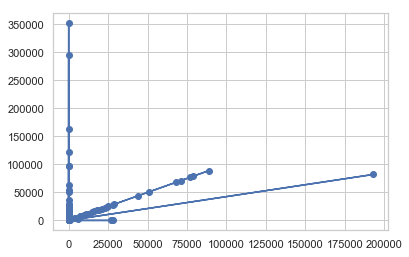

In [21]:
mirar= df_variables_cuant[['nosis_BCRAmonto4','siisa_monto4s']]
mirar=mirar.dropna()
plt.plot(mirar.nosis_BCRAmonto4,mirar.siisa_monto4s,'-o')

### Variables categoricas
Para este apartado a fin de evaluar la relacion entre variables categoricas utilizo el [coeficiente](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) de incerteza basado 
en la entropia condicional. Las herramientas las podemos descargar de este [repo](https://github.com/shakedzy/dython).



In [22]:
from dython.nominal import associations, conditional_entropy, theils_u

In [23]:
# Descarto todas las variables categoricas.
# tengo que seguir con esto luego.
#df_variables_cat=df.drop(df_variables_select.select_dtypes(['float64']), axis=1)

In [24]:
#df_variables_cat.info()

## Scores 
El propósito de los gráficos a continuación es evaluar el desempenio de cada score y compararlos entre si modo tal de ver alguna tendencia.




In [25]:
# Evalúo que existan todos los pares xy para evaluar scores.
df_scores=df[['siisa_score','veraz_score','nosis_score']]

In [26]:
# Me saco de encima los registros donde no se evaluan todos los scores.
df_scores=df_scores.dropna()
df_scores.shape

(17503, 3)


###  Siisa vs Nosis:

In [27]:
# calculo arrays de quatiles para cada bureau donde barro el rango [0-1 de quantiles]
nosis_q = [df_scores.nosis_score.quantile(i/10) for i in range(10)]
siisa_q = [df_scores.siisa_score.quantile(i/10) for i in range(10)]
veraz_q = [df_scores.veraz_score.quantile(i/10) for i in range(10)]

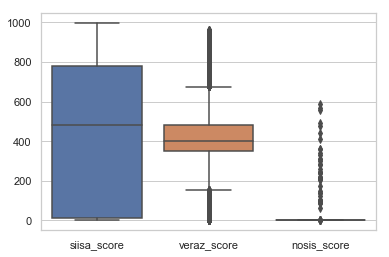

In [28]:
sns.boxplot(data=df_scores)

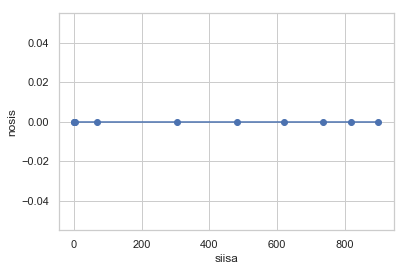

In [29]:
# Ploteo la primer comparacion (Siisa vs Nosis).
plt.plot(siisa_q, nosis_q, '-o')
plt.xlabel('siisa')
plt.ylabel('nosis')
plt.show()

### Siisa vs Veraz

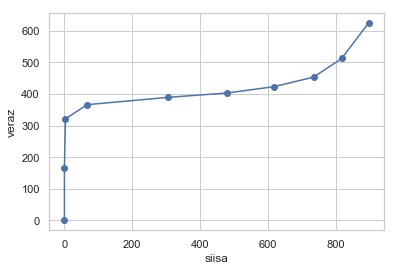

In [30]:
# Ploteo la segunda comparacion (Siisa vs Veraz).
plt.plot(siisa_q, veraz_q, '-o')
plt.xlabel('siisa')
plt.ylabel('veraz')
plt.show()

### Nosis vs Veraz


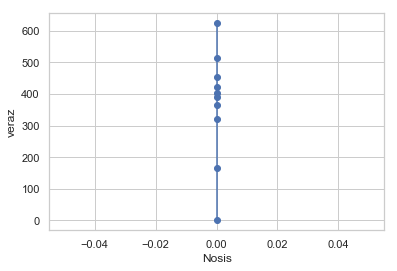

In [31]:
# Ploteo la tercer comparacion (Nosis vs Veraz).
plt.plot(nosis_q, veraz_q, '-o')
plt.xlabel('Nosis')
plt.ylabel('veraz')
plt.show()

## Correspondencia en la clasificación.

Con el objetivo de ver como clasifican  ambos scores a una población en particular se calculó un percentil de una población para un dado score y se evaluó como cayó en el segundo ranking. 

In [32]:
# Calculo a pertencencia de percentiles intra-score.

from scipy import stats
rank_array_nosis=stats.rankdata(df_variables_select.nosis_score.to_numpy(), "average")/len(df_variables_select.nosis_score.to_numpy())
rank_array_siisa=stats.rankdata(df_variables_select.siisa_score.to_numpy(), "average")/len(df_variables_select.siisa_score.to_numpy())
rank_array_veraz=stats.rankdata(df_variables_select.veraz_score.to_numpy(), "average")/len(df_variables_select.veraz_score.to_numpy())

bins= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
nosis_score= pd.cut(rank_array_nosis,bins)
siisa_score= pd.cut(rank_array_siisa,bins)
veraz_score= pd.cut(rank_array_veraz,bins)

print(pd.value_counts(nosis_score))
print(pd.value_counts(siisa_score))
print(pd.value_counts(veraz_score))

(0.4, 0.6]    28788
(0.8, 1.0]       91
(0.6, 0.8]        0
(0.2, 0.4]        0
(0.0, 0.2]        0
dtype: int64
(0.4, 0.6]    5785
(0.0, 0.2]    5779
(0.8, 1.0]    5776
(0.2, 0.4]    5771
(0.6, 0.8]    5768
dtype: int64
(0.2, 0.4]    5801
(0.6, 0.8]    5780
(0.8, 1.0]    5776
(0.4, 0.6]    5776
(0.0, 0.2]    5746
dtype: int64


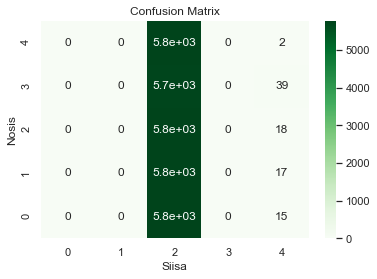

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(siisa_score.codes,nosis_score.codes)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Greens"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Siisa');ax.set_ylabel('Nosis'); 
ax.set_title('Confusion Matrix'); 
ax.invert_yaxis()

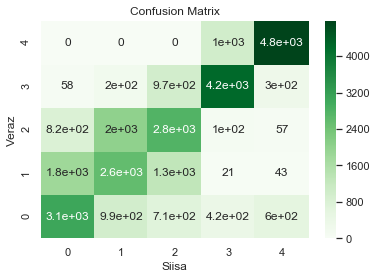

In [34]:
cm = confusion_matrix(siisa_score.codes,veraz_score.codes)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="Greens"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Siisa');ax.set_ylabel('Veraz'); 
ax.set_title('Confusion Matrix'); 
ax.invert_yaxis()

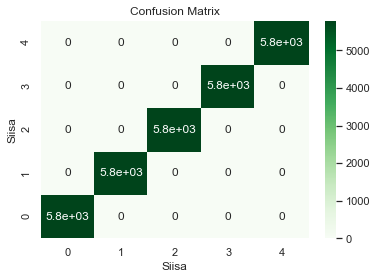

In [35]:
cm = confusion_matrix(siisa_score.codes,siisa_score.codes)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="Greens"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Siisa');ax.set_ylabel('Siisa'); 
ax.set_title('Confusion Matrix'); 
ax.invert_yaxis()

In [36]:
dist=df.siisa_scorePoblacion.dropna()

In [37]:
g4=sns.boxplot?

In [ ]:
g4=sns.boxplot

In [38]:
dist.value_counts()

H    11867
T     2917
Name: siisa_scorePoblacion, dtype: int64